<h1> Big Data

<h2> Group 5

<h4> Create a spark session and load the Incident Management Data set

In [0]:
from pyspark.sql import SparkSession


In [0]:
spark = SparkSession.builder.appName('Desicion-Tree').getOrCreate()

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql.functions import * 
from pyspark.sql.types import *
from pyspark.sql.functions import rand, randn


In [0]:
# File Upload for all the models

file_location = "/FileStore/tables/airbnb.csv"
file_type = "csv"
 
# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","
 
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

In [0]:
data = df

In [0]:
data=data.dropna()


In [0]:
df.printSchema()

root
 |-- host_is_superhost: integer (nullable = true)
 |-- host_identity_verified: integer (nullable = true)
 |-- neighbourhood_cleansed: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- property_type: string (nullable = true)
 |-- room_type: string (nullable = true)
 |-- accommodates: integer (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- bedrooms: integer (nullable = true)
 |-- beds: integer (nullable = true)
 |-- bed_type: string (nullable = true)
 |-- Number_of_amenities: integer (nullable = true)
 |-- guests_included: integer (nullable = true)
 |-- price_per_extra_person: integer (nullable = true)
 |-- minimum_nights: integer (nullable = true)
 |-- number_of_reviews: integer (nullable = true)
 |-- number_days_btw_first_last_review: integer (nullable = true)
 |-- review_scores_rating: integer (nullable = true)
 |-- cancellation_policy: string (nullable = true)
 |-- price: integer (nullable = true)
 |-- 

<h3>Building the K Means model

In [0]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler,StringIndexer
from pyspark.ml import Pipeline

<h3>Data transformation

In [0]:
# Use StringIndexer to convert the categorical columns to hold numerical data
 
host_is_superhost_indexer = StringIndexer(inputCol='host_is_superhost',outputCol='host_is_superhost_index',handleInvalid='keep')
host_identity_verified_indexer = StringIndexer(inputCol='host_identity_verified',outputCol='host_identity_verified_index',handleInvalid='keep')
neighbourhood_cleansed_indexer = StringIndexer(inputCol='neighbourhood_cleansed',outputCol='neighbourhood_cleansed_index',handleInvalid='keep')
property_type_indexer = StringIndexer(inputCol='property_type',outputCol='property_type_index',handleInvalid='keep')
room_type_indexer = StringIndexer(inputCol='room_type',outputCol='room_type_index',handleInvalid='keep')
bed_type_indexer = StringIndexer(inputCol='bed_type',outputCol='bed_type_index',handleInvalid='keep')
cancellation_policy_group_indexer = StringIndexer(inputCol='cancellation_policy',outputCol='cancellation_policy_index',handleInvalid='keep')
price_category_indexer = StringIndexer(inputCol='price_category',outputCol='price_category_index',handleInvalid='keep')

In [0]:
# Vector assembler is used to create a vector of input features
 
assembler = VectorAssembler(inputCols=['host_is_superhost_index','host_identity_verified_index','neighbourhood_cleansed_index',
                                       'property_type_index','room_type_index','bed_type_index','cancellation_policy_index',
                                       'price_category_index','latitude','longitude','accommodates','bathrooms',
                                       'bedrooms','beds','Number_of_amenities','guests_included','price_per_extra_person',
                                       'minimum_nights','number_of_reviews','number_days_btw_first_last_review',
                                       'review_scores_rating','price','price_gte_150'],
                            outputCol="features")

In [0]:
# Pipeline is used to pass the data through indexer and assembler simultaneously. Also, it helps to pre-rocess the test data
# in the same way as that of the train data.
 
pipe = Pipeline(stages=[host_is_superhost_indexer,host_identity_verified_indexer,neighbourhood_cleansed_indexer,property_type_indexer,room_type_indexer,bed_type_indexer,cancellation_policy_group_indexer,price_category_indexer,assembler])

In [0]:
final_data=pipe.fit(data).transform(data)
 

In [0]:
display(final_data)

host_is_superhost host_identity_verified neighbourhood_cleansed latitude longitude property_type room_type accommodates bathrooms bedrooms beds bed_type Number_of_amenities guests_included price_per_extra_person minimum_nights number_of_reviews number_days_btw_first_last_review review_scores_rating cancellation_policy price price_gte_150 price_category host_is_superhost_index host_identity_verified_index neighbourhood_cleansed_index property_type_index room_type_index bed_type_index cancellation_policy_index price_category_index features 0 1 Roslindale 42.28624082 -71.13437396 Apartment Private room 2 1.0 1 1 Real Bed 20 0 0 2 36 804 94 moderate 65 0 lte_$75 0.0 0.0 16.0 0.0 1.0 0.0 1.0 3.0 Map(vectorType -> dense, length -> 23, values -> List(0.0, 0.0, 16.0, 0.0, 1.0, 0.0, 1.0, 3.0, 42.28624082, -71.13437396, 2.0, 1.0, 1.0, 1.0, 20.0, 0.0, 0.0, 2.0, 36.0, 804.0, 94.0, 65.0, 0.0)) 1 1 Roslindale 42.29243789 -71.13576525 Apartment Private room 2 1.0 1 1 Real Bed 17 1 20 3 41 2574 98 moderate 65 0 lte_$75 1.0 0.0 16.0 0.0 1.0 0.0 1.0 3.0 Map(vectorType -> dense, length -> 23, values -> List(1.0, 0.0, 16.0, 0.0, 1.0, 0.0, 1.0, 3.0, 42.29243789, -71.13576525, 2.0, 1.0, 1.0, 1.0, 17.0, 1.0, 20.0, 3.0, 41.0, 2574.0, 98.0, 65.0, 0.0)) 0 0 Roslindale 42.28110619 -71.12102117 House Private room 4 1.0 1 2 Real Bed 22 2 25 1 1 0 100 moderate 75 0 lte_$75 0.0 1.0 16.0 1.0 1.0 0.0 1.0 3.0 Map(vectorType -> dense, length -> 23, values -> List(0.0, 1.0, 16.0, 1.0, 1.0, 0.0, 1.0, 3.0, 42.28110619, -71.12102117, 4.0, 1.0, 1.0, 2.0, 22.0, 2.0, 25.0, 1.0, 1.0, 0.0, 100.0, 75.0, 0.0)) 1 1 Roslindale 42.28451221 -71.13625805 House Private room 2 1.5 1 2 Real Bed 13 1 0 2 29 380 99 flexible 79 0 btw_$75-$150 1.0 0.0 16.0 1.0 1.0 0.0 2.0 0.0 Map(vectorType -> dense, length -> 23, values -> List(1.0, 0.0, 16.0, 1.0, 1.0, 0.0, 2.0, 0.0, 42.28451221, -71.13625805, 2.0, 1.5, 1.0, 2.0, 13.0, 1.0, 0.0, 2.0, 29.0, 380.0, 99.0, 79.0, 0.0)) 1 1 Roslindale 42.2916898 -71.13189277 Condominium Private room 2 1.0 1 1 Real Bed 12 1 0 2 8 130 100 flexible 75 0 lte_$75 1.0 0.0 16.0 2.0 1.0 0.0 2.0 3.0 Map(vectorType -> dense, length -> 23, values -> List(1.0, 0.0, 16.0, 2.0, 1.0, 0.0, 2.0, 3.0, 42.2916898, -71.13189277, 2.0, 1.0, 1.0, 1.0, 12.0, 1.0, 0.0, 2.0, 8.0, 130.0, 100.0, 75.0, 0.0)) 0 1 Roslindale 42.28138963 -71.13119042 Apartment Entire home/apt 3 1.0 1 2 Real Bed 12 1 25 1 57 421 90 strict 100 0 btw_$75-$150 0.0 0.0 16.0 0.0 0.0 0.0 0.0 0.0 Map(vectorType -> dense, length -> 23, values -> List(0.0, 0.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 42.28138963, -71.13119042, 3.0, 1.0, 1.0, 2.0, 12.0, 1.0, 25.0, 1.0, 57.0, 421.0, 90.0, 100.0, 0.0)) 1 1 Roslindale 42.2819461 -71.14102161 House Private room 2 2.0 1 1 Real Bed 22 1 15 1 67 840 96 moderate 75 0 lte_$75 1.0 0.0 16.0 1.0 1.0 0.0 1.0 3.0 Map(vectorType -> dense, length -> 23, values -> List(1.0, 0.0, 16.0, 1.0, 1.0, 0.0, 1.0, 3.0, 42.2819461, -71.14102161, 2.0, 2.0, 1.0, 1.0, 22.0, 1.0, 15.0, 1.0, 67.0, 840.0, 96.0, 75.0, 0.0)) 1 1 Roslindale 42.28587764 -71.12490956 Condominium Private room 2 1.0 1 2 Real Bed 9 2 0 2 65 355 96 moderate 58 0 lte_$75 1.0 0.0 16.0 2.0 1.0 0.0 1.0 3.0 Map(vectorType -> dense, length -> 23, values -> List(1.0, 0.0, 16.0, 2.0, 1.0, 0.0, 1.0, 3.0, 42.28587764, -71.12490956, 2.0, 1.0, 1.0, 2.0, 9.0, 2.0, 0.0, 2.0, 65.0, 355.0, 96.0, 58.0, 0.0)) 1 1 Roslindale 42.28882028 -71.1395101 Apartment Entire home/apt 5 1.0 2 2 Real Bed 21 4 25 4 33 876 94 strict 229 1 gte_226 1.0 0.0 16.0 0.0 0.0 0.0 0.0 2.0 Map(vectorType -> dense, length -> 23, values -> List(1.0, 0.0, 16.0, 0.0, 0.0, 0.0, 0.0, 2.0, 42.28882028, -71.1395101, 5.0, 1.0, 2.0, 2.0, 21.0, 4.0, 25.0, 4.0, 33.0, 876.0, 94.0, 229.0, 1.0)) 0 0 Roslindale 42.2864482 -71.13932539 House Private room 2 1.0 1 1 Real Bed 15 1 10 1 1 0 80 flexible 60 0 lte_$75 0.0 1.0 16.0 1.0 1.0 0.0 2.0 3.0 Map(vectorType -> dense, length -> 23, values -> List(0.0, 1.0, 16.0, 1.0, 1.0, 0.0, 2.0, 3.0, 42.2864482, -71.13932539, 2.0, 1.0, 1.0, 1.0, 15.0, 1.

<h3> Determine number of clusters.

In [0]:

from pyspark.ml.clustering import KMeans

In [0]:
errors=[]

for k in range(2,10):
    kmeans = KMeans(featuresCol='features',k=k)
    model = kmeans.fit(final_data)
    intra_distance = model.summary.trainingCost
    errors.append(intra_distance)
    print("With K={}".format(k))
    print("Within Set Sum of Squared Errors = " + str(intra_distance))
    print('--'*30)

With K=2
Within Set Sum of Squared Errors = 196002815.83461052
------------------------------------------------------------
With K=3
Within Set Sum of Squared Errors = 112589008.82705025
------------------------------------------------------------
With K=4
Within Set Sum of Squared Errors = 70515753.87717593
------------------------------------------------------------
With K=5
Within Set Sum of Squared Errors = 61725896.66569137
------------------------------------------------------------
With K=6
Within Set Sum of Squared Errors = 46705045.031760514
------------------------------------------------------------
With K=7
Within Set Sum of Squared Errors = 41737849.22853173
------------------------------------------------------------
With K=8
Within Set Sum of Squared Errors = 37187882.76173363
------------------------------------------------------------
With K=9
Within Set Sum of Squared Errors = 34728595.44427071
------------------------------------------------------------


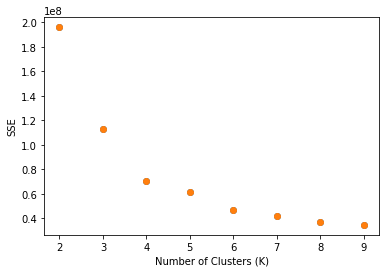

In [0]:
cluster_number = range(2,10)
plt.scatter(cluster_number,errors)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.scatter(cluster_number,errors)
plt.show()

<h3> Number of cluster selection

In [0]:

 
kmeans_model = KMeans(k=5)

In [0]:
fit_model = kmeans_model.fit(final_data)

In [0]:
wssse = fit_model.summary.trainingCost # for spark 3.0
print("The within set sum of squared error of the mode is {}".format(wssse))


The within set sum of squared error of the mode is 61725896.66569137


In [0]:
centers = fit_model.clusterCenters()

In [0]:
print("Cluster Centers")
index=1
for cluster in centers:
    print("Centroid {}: {}".format(index,cluster))
    index+=1

Cluster Centers
Centroid 1: [ 8.01248699e-02  3.31945890e-01  6.73673257e+00  5.40062435e-01
  6.28511967e-01  1.36316337e-01  1.00832466e+00  1.18418314e+00
  4.23369474e+01 -7.10888253e+01  2.34755463e+00  1.14412071e+00
  9.98959417e-01  1.29136316e+00  1.40457856e+01  1.20707596e+00
  9.72112383e+00  2.92715921e+00  7.63683663e+00  6.53891779e+01
  9.10874089e+01  1.02454735e+02  2.15400624e-01]
Centroid 2: [ 2.62331839e-01  1.43497758e-01  6.54260090e+00  5.44843049e-01
  4.28251121e-01  6.72645740e-02  7.30941704e-01  1.21748879e+00
  4.23349298e+01 -7.10854649e+01  3.06950673e+00  1.21300448e+00
  1.23542601e+00  1.66143498e+00  1.52600897e+01  1.63452915e+00
  1.48654709e+01  3.27354260e+00  5.83049327e+01  8.67219731e+02
  9.21434978e+01  1.67565022e+02  4.70852018e-01]
Centroid 3: [ 1.13207547e-01  2.26415094e-01  6.34905660e+00  5.75471698e-01
  3.67924528e-01  7.54716981e-02  7.83018868e-01  1.47169811e+00
  4.23378018e+01 -7.10811310e+01  3.60377358e+00  1.18867925e+00
  1

In [0]:
results = fit_model.transform(final_data)

In [0]:
results.select(['host_is_superhost_index','host_identity_verified_index','neighbourhood_cleansed_index',
                                       'property_type_index','room_type_index','bed_type_index','cancellation_policy_index',
                                       'price_category_index','latitude','longitude','accommodates','bathrooms',
                                       'bedrooms','beds','Number_of_amenities','guests_included','price_per_extra_person',
                                       'minimum_nights','number_of_reviews','number_days_btw_first_last_review',
                                       'review_scores_rating','price','price_gte_150']).show()

+-----------------------+----------------------------+----------------------------+-------------------+---------------+--------------+-------------------------+--------------------+-----------+------------+------------+---------+--------+----+-------------------+---------------+----------------------+--------------+-----------------+---------------------------------+--------------------+-----+-------------+
|host_is_superhost_index|host_identity_verified_index|neighbourhood_cleansed_index|property_type_index|room_type_index|bed_type_index|cancellation_policy_index|price_category_index|   latitude|   longitude|accommodates|bathrooms|bedrooms|beds|Number_of_amenities|guests_included|price_per_extra_person|minimum_nights|number_of_reviews|number_days_btw_first_last_review|review_scores_rating|price|price_gte_150|
+-----------------------+----------------------------+----------------------------+-------------------+---------------+--------------+-------------------------+------------------

<h3> Cluster Summary

In [0]:
results.groupby('prediction').count().sort('prediction').show()

+----------+-----+
|prediction|count|
+----------+-----+
|         0|  961|
|         1|  446|
|         2|  106|
|         3|  733|
|         4|  486|
+----------+-----+



<h3> Cluster Graph

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

/databricks/spark/python/pyspark/sql/pandas/conversion.py:119: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


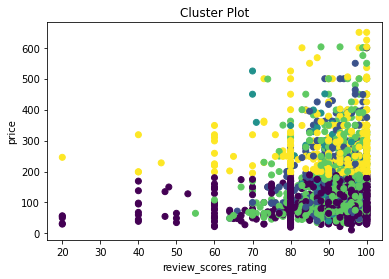

In [0]:
# get cluster assignments
predictions = results

# convert Spark DataFrame to Pandas DataFrame for plotting
pandas_df = predictions.toPandas()

# plot clusters
plt.scatter(pandas_df['review_scores_rating'], pandas_df['price'], c=pandas_df['prediction'])
plt.title("Cluster Plot")
plt.xlabel("review_scores_rating")
plt.ylabel("price")
plt.show()

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [0]:
pandas_df = predictions.toPandas()
pandas_df.head()

/databricks/spark/python/pyspark/sql/pandas/conversion.py:119: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


host_is_superhost 
 host_identity_verified 
 neighbourhood_cleansed 
 latitude 
 longitude 
 property_type 
 room_type 
 accommodates 
 bathrooms 
 bedrooms 
 ... 
 host_is_superhost_index 
 host_identity_verified_index 
 neighbourhood_cleansed_index 
 property_type_index 
 room_type_index 
 bed_type_index 
 cancellation_policy_index 
 price_category_index 
 features 
 prediction 
 
 
 
 
 0 
 0 
 1 
 Roslindale 
 42.286241 
 -71.134374 
 Apartment 
 Private room 
 2 
 1.0 
 1 
 ... 
 0.0 
 0.0 
 16.0 
 0.0 
 1.0 
 0.0 
 1.0 
 3.0 
 [0.0, 0.0, 16.0, 0.0, 1.0, 0.0, 1.0, 3.0, 42.2... 
 1 
 
 
 1 
 1 
 1 
 Roslindale 
 42.292438 
 -71.135765 
 Apartment 
 Private room 
 2 
 1.0 
 1 
 ... 
 1.0 
 0.0 
 16.0 
 0.0 
 1.0 
 0.0 
 1.0 
 3.0 
 [1.0, 0.0, 16.0, 0.0, 1.0, 0.0, 1.0, 3.0, 42.2... 
 2 
 
 
 2 
 0 
 0 
 Roslindale 
 42.281106 
 -71.121021 
 House 
 Private room 
 4 
 1.0 
 1 
 ... 
 0.0 
 1.0 
 16.0 
 1.0 
 1.0 
 0.0 
 1.0 
 3.0 
 [0.0, 1.0, 16.0, 1.0, 1.0, 0.0, 1.0, 3.0, 42.2... 
 0 
 
 
 3 
 1 
 1 
 Roslindale 
 42.284512 
 -71.136258 
 House 
 Private room 
 2 
 1.5 
 1 
 ... 
 1.0 
 0.0 
 16.0 
 1.0 
 1.0 
 0.0 
 2.0 
 0.0 
 [1.0, 0.0, 16.0, 1.0, 1.0, 0.0, 2.0, 0.0, 42.2... 
 3 
 
 
 4 
 1 
 1 
 Roslindale 
 42.291690 
 -71.131893 
 Condominium 
 Private room 
 2 
 1.0 
 1 
 ... 
 1.0 
 0.0 
 16.0 
 2.0 
 1.0 
 0.0 
 2.0 
 3.0 
 [1.0, 0.0, 16.0, 2.0, 1.0, 0.0, 2.0, 3.0, 42.2... 
 0 
 
 
 
 5 rows × 33 columns

<command-2248947621643539>:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  cluster_vis = plt.figure(figsize=(15,10)).gca(projection='3d')


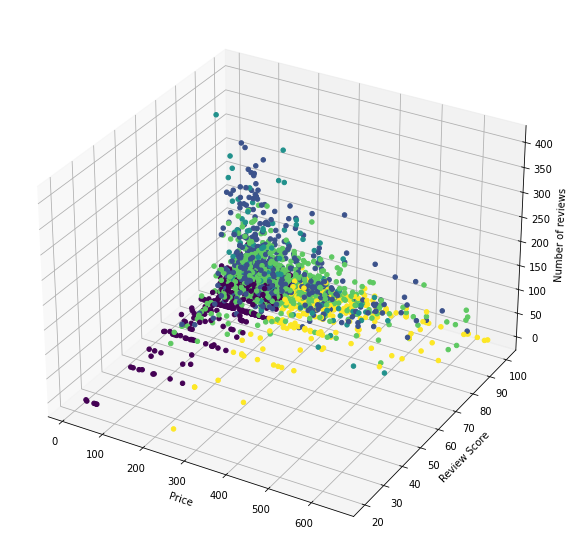

In [0]:
cluster_vis = plt.figure(figsize=(15,10)).gca(projection='3d')
cluster_vis.scatter(pandas_df.price, pandas_df.review_scores_rating, pandas_df.number_of_reviews, c=pandas_df.prediction,depthshade=False)
cluster_vis.set_xlabel('Price')
cluster_vis.set_ylabel('Review Score')
cluster_vis.set_zlabel('Number of reviews')
plt.show()